In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [2]:
X=np.array([4,5,5.6,6.8,7,7.2,8,0.8,1.0,1.2,2.5,2.6,3.0,4.3])
X=X.reshape(14,1)

In [3]:
t= np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
t=t.reshape(14,1)

In [4]:
## Standardize X for mean 0, variance 1, scatter plot of data and targets

In [5]:
X= StandardScaler(0,1).fit_transform(X)

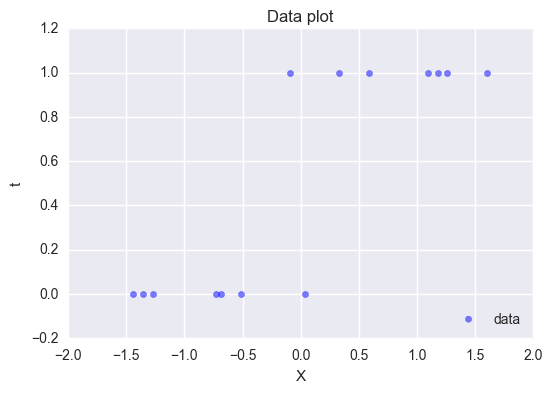

In [6]:
plt.scatter(X,t,color="blue",alpha=0.5,label="data")
plt.ylabel("Targets")
plt.xlabel("Scaled Data")
plt.xlabel('X')
plt.ylabel('t')
plt.legend(loc='lower right')
plt.title("Data plot")
plt.show()


# b) Ridge regression lambda=0.1

In [7]:
ridge = linear_model.Ridge(alpha=0.1).fit(X, t)

In [8]:
predict_ridge=ridge.predict(X)

# Logistic Regression

In [9]:
#We use np.ravel to flatten t

logreg=linear_model.LogisticRegression(penalty='l2',C=10).fit(X,t.ravel())

In [10]:
proba=logreg.predict_proba(X)

In [11]:
predict_log=logreg.predict(X)

rw0=ridge.coef_
rw1=ridge.intercept_
lw0=logreg.coef_
lw1=logreg.intercept_

In [12]:
print('Ridge regression coefficient (Part B): {0}'.format(ridge.coef_))
print('Ridge regression intercept (Part B): {0}'.format(ridge.intercept_))
print('Logistic regression coefficient (Part B): {0}'.format(logreg.coef_))
print('Logistic regression intercept (Part B): {0}'.format(logreg.intercept_))

Ridge regression coefficient (Part B): [[ 0.42263874]]
Ridge regression intercept (Part B): [ 0.5]
Logistic regression coefficient (Part B): [[ 3.52928384]]
Logistic regression intercept (Part B): [ 0.104634]


In [13]:
yr=rw0*X+rw1
yl=lw0*X+lw1

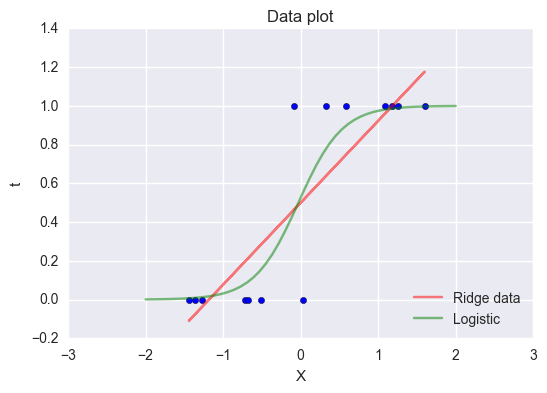

In [21]:
plt.scatter(X,t)
#def model(X):
#    return 1 / (1 + np.exp(-X))
#loss = model(X * logreg.coef_ + logreg.intercept_)
xlist = np.linspace(-2.0, 2.0, 50).reshape(50,1)

plt.plot(X,yr,color="red",label='Ridge data',alpha=0.5)
y_ridge = ridge.predict(xlist)

y_logreg = logreg.predict_proba(xlist)
plt.plot(xlist, y_logreg[:,1], color="Green", label='Logistic', alpha=0.5)

#plt.plot(X,proba[:,1],color="blue",label='Logistic prob',alpha=0.5)
plt.title('Logistic and Ridge Regression predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend(loc='lower right')
plt.title("Data plot")

plt.show()

In [22]:
old_coeff=logreg.coef_[0][0]

In [23]:
old_int=logreg.intercept_[0]

# C

#adding (x15,t15) =(12,1) to dataset and redoing a,b

In [24]:
Xm=np.array([4,5,5.6,6.8,7,7.2,8,0.8,1.0,1.2,2.5,2.6,3.0,4.3,12])
Xm=Xm.reshape(15,1)

In [25]:
tm= np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,1])
tm=tm.reshape(15,1)

In [26]:
Xm= StandardScaler(0,1).fit_transform(Xm)

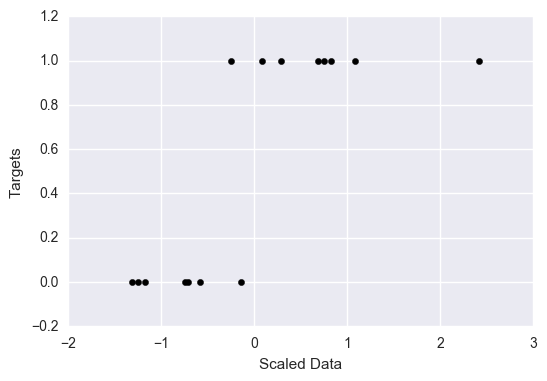

In [27]:
plt.scatter(Xm,tm,c='black')
plt.ylabel("Targets")
plt.xlabel("Scaled Data")
plt.show()

In [28]:
ridgem = linear_model.Ridge(alpha=0.1).fit(Xm, tm.ravel())
predict_ridgem=ridge.predict(Xm)
rwm0=ridgem.coef_
rwm1=ridgem.intercept_
yrm=rwm0*Xm+rwm1


In [29]:
logregm=linear_model.LogisticRegression(penalty='l2',C=10).fit(Xm,tm.ravel())
predict_logm=logreg.predict(Xm)
predlogm=logreg.predict_proba(Xm)

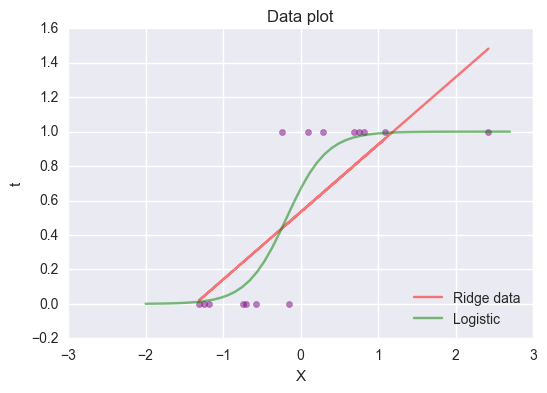

In [33]:
plt.scatter(Xm,tm,color="purple",alpha=0.5)

xlist = np.linspace(-2.0, 2.7, 50).reshape(50,1)

plt.plot(Xm,yrm,color="red",label='Ridge data',alpha=0.5)
y_ridgem = ridgem.predict(xlist)

y_logregm = logregm.predict_proba(xlist)
plt.plot(xlist, y_logregm[:,1], color="Green", label='Logistic', alpha=0.5)

#plt.plot(X,proba[:,1],color="blue",label='Logistic prob',alpha=0.5)
plt.title('Logistic and Ridge Regression predictions')
plt.xlabel('X')
plt.ylabel('t')
plt.legend(loc='lower right')
plt.title("Data plot")

plt.show()

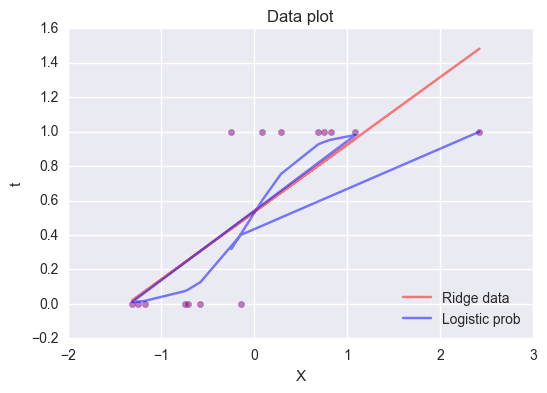

In [30]:
#plt.scatter(Xm,tm,color="purple",alpha=0.5)
#plt.plot(Xm,yrm,color="red",label='Ridge data',alpha=0.5)
#def model(X):
#    return 1 / (1 + np.exp(-X))
#loss = model(X * logreg.coef_ + logreg.intercept_)

#plt.plot(Xm,predlogm[:,1],color="blue",label='Logistic prob',alpha=0.5)
#plt.title('Logistic and Ridge Regression predictions')
#plt.xlabel('X')
#plt.ylabel('t')
#plt.legend(loc='lower right')
#plt.title("Data plot")

#plt.show()

In [150]:
new_int=logregm.intercept_[0]
new_coeff=logregm.coef_[0][0]

In [154]:
pred_old_log=logreg.predict_proba(X)[:,1]
pred_new_log = logregm.predict_proba(Xm)[:,1]

pred_old_ridge=predict_ridge
pred_new_ridge=predict_ridgem

# Sensitivity Analysis

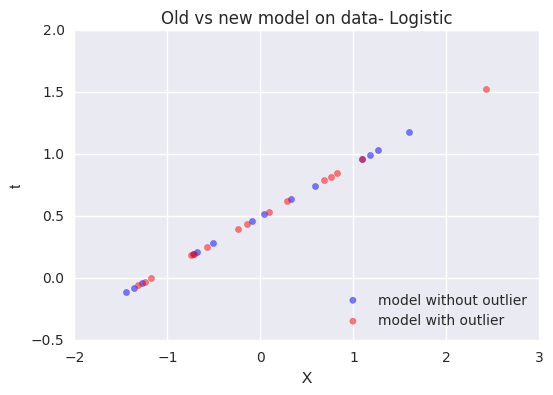

In [155]:
%matplotlib inline

plt.scatter(X,pred_old_ridge,color="blue",alpha=0.5,label='model without outlier')
plt.scatter(Xm,pred_new_ridge,color="red",alpha=0.5,label="model with outlier")
plt.legend(loc='lower right')
plt.xlabel('X')
plt.ylabel('t')
plt.title("Old vs new model on data- Logistic")

### No difference between the Ridge regression with new values and without them.

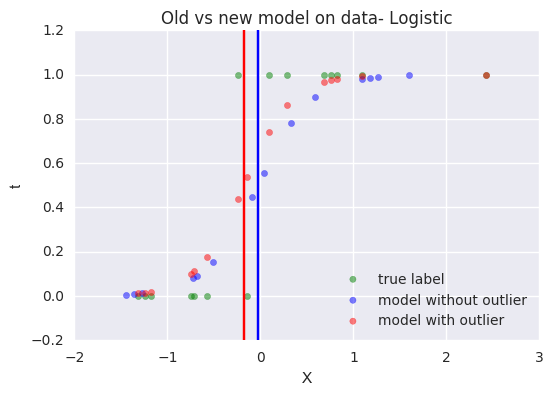

In [151]:
%matplotlib inline
plt.axvline(x=old_int/(-old_coeff),color="blue")
plt.axvline(x=new_int/(-new_coeff),color="red")
plt.scatter(Xm,tm,color="green",label="true label",alpha=0.5)
plt.scatter(X,pred_old_log,color="blue",alpha=0.5,label='model without outlier')
plt.scatter(Xm,pred_new_log,color="red",alpha=0.5,label="model with outlier")
plt.legend(loc='lower right')
plt.xlabel('X')
plt.ylabel('t')
plt.title("Old vs new model on data- Logistic")

### As we can see the old model seems to follow the new one, so there is not much difference in the logistic sensitivity

In [152]:
ridge_cfm=confusion_matrix(t,[np.rint(p) for p in predict_ridge])
ridge_accuracy=(ridge_cfm[0][0]+ridge_cfm[1][1])/15

print('Ridge Accuracy',ridge_accuracy)

Ridge Accuracy 0.8


In [153]:
logreg_cfm=confusion_matrix(t,predict_log)
logreg_accuracy=(logreg_cfm[0][0]+logreg_cfm[1][1])/15

print('Logistic Accuracy',logreg_accuracy)

Logistic Accuracy 0.8


# Q3

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from mnist import MNIST
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder


In [121]:
def load_dataset():
    mndata = MNIST('./data/')
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0

    X_train = np.asarray(X_train).reshape(60000, 784)
    labels_train = np.asarray(labels_train).reshape(60000, 1)
    X_test = np.asarray(X_test).reshape(10000, 784)
    labels_test = np.asarray(labels_test).reshape(10000, 1)

    return X_train, labels_train, X_test, labels_test


In [123]:
if __name__ == "__main__":

    #Reading Data
    X_train, labels_train, X_test, labels_test = load_dataset()
    
    #Standardizing
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)

    #Training

    logreg = linear_model.LogisticRegressionCV(Cs=np.array([1,2,5,10]))
    logreg.fit(X_train, labels_train.ravel())
    print('Selected hyper-parameter: {0}'.format(logreg.C_))

    #Predicting

    pred_labels_train = logreg.predict(X_train)
    pred_labels_test = logreg.predict(X_test)

    #Accuracy prediction
    print("Train accuracy: {0}".format(metrics.accuracy_score(labels_train, pred_labels_train))) 
    print("Test accuracy: {0}".format(metrics.accuracy_score(labels_test, pred_labels_test))) 

Selected hyper-parameter: [ 1  1  1  2  1 10  1  1  1  2]
Train accuracy: 0.9315166666666667
Test accuracy: 0.9174


### In homework 4,an accuracy of 0.98335 on training data and 0.9726 on test data for the ridge regression, thus it was better in prediction accuracy than the Logistic regression